In [1]:
import numpy as np
import pandas as pd
import datetime
# !pip install pandas_datareader
import pandas_datareader.data as web
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
start = datetime.datetime(2018, 9, 4)
end = datetime.datetime(2019, 9, 3)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002


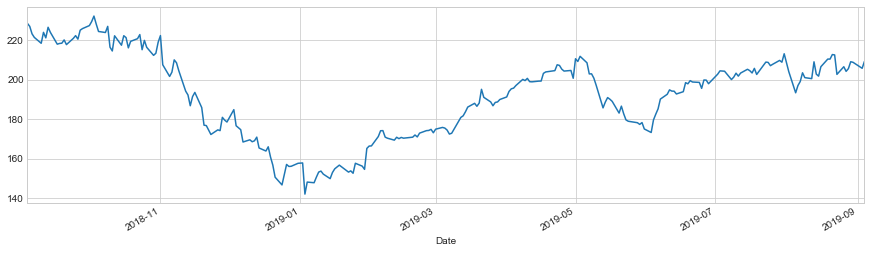

In [3]:
df.xs(key='Close',axis=1).plot(figsize=(15,4))

### Returns

In [4]:
df['Return'] = df['Close'].pct_change()
df.head()

,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2018-09-04,229.179993,226.630005,228.410004,228.360001,27390100.0,224.870499,NaN
2018-09-05,229.669998,225.100006,228.990005,226.869995,33333000.0,223.403275,-0.006525
2018-09-06,227.350006,221.300003,226.229996,223.100006,34290000.0,219.690903,-0.016617
2018-09-07,225.369995,220.710007,221.850006,221.300003,37619800.0,217.918411,-0.008068
2018-09-10,221.850006,216.470001,220.949997,218.330002,39516500.0,214.993759,-0.013421


In [5]:
df['Return'].idxmin()

Timestamp('2019-01-03 00:00:00')

In [6]:
df.loc[df['Return'].idxmin()]

High         1.457200e+02
Low          1.420000e+02
Open         1.439800e+02
Close        1.421900e+02
Volume       9.131220e+07
Adj Close    1.405058e+02
Return      -9.960737e-02
Name: 2019-01-03 00:00:00, dtype: float64

In [7]:
df['Return'].idxmax()

Timestamp('2018-12-26 00:00:00')

In [8]:
df.loc[df['Return'].idxmax()]

High         1.572300e+02
Low          1.467200e+02
Open         1.483000e+02
Close        1.571700e+02
Volume       5.858250e+07
Adj Close    1.553083e+02
Return       7.042155e-02
Name: 2018-12-26 00:00:00, dtype: float64

/Users/jacquelinewong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jacquelinewong/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


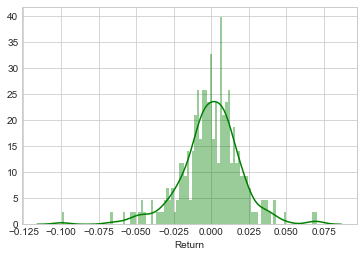

In [9]:
sns.distplot(df['Return'][1:],color='green',bins=100,kde=True)


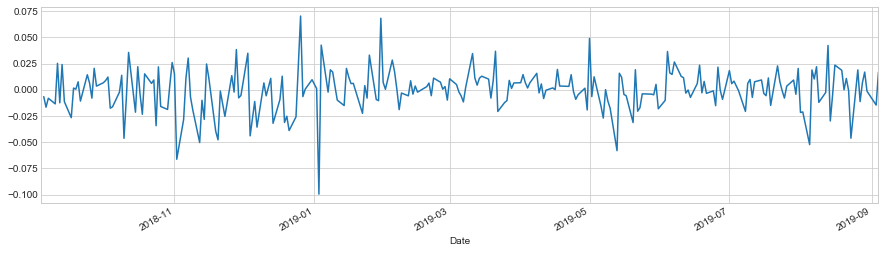

In [10]:
df['Return'].plot(label='Return', figsize=(15,4))

## Moving Averages

/Users/jacquelinewong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/jacquelinewong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


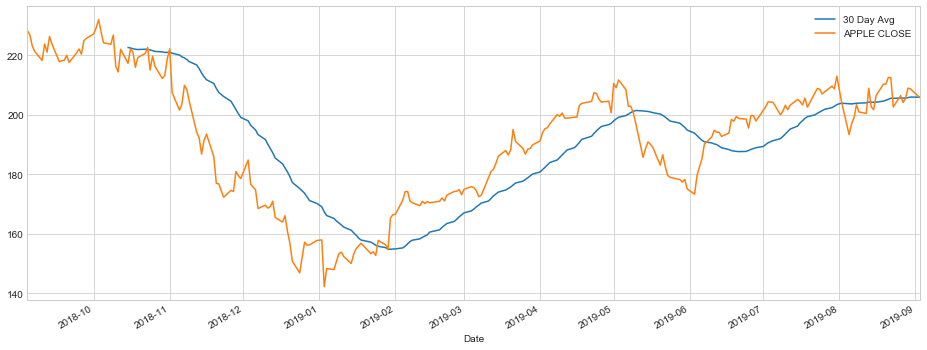

In [11]:
plt.figure(figsize=(16,6))
df['Close'].ix['2018-09-04':'2019-09-03'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].ix['2018-09-04':'2019-09-03'].plot(label='APPLE CLOSE')
plt.legend()

# Predicting Stock Price


We will use these three machine learning models to predict our stocks: Simple Linear Regression, Polynomial Regression, and K Nearest Neighbor (KNN). 

In [12]:
import math  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import linear_model

/Users/jacquelinewong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out)#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [14]:
forecast_col = 'Close'#choosing which column to forecast
forecast_out = 5 #how far to forecast 
test_size = 0.2 #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size) #calling the method were the cross validation and data preperation is in

# Linear Regression

In [15]:
learner = linear_model.LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model
learner_score=learner.score(X_test,Y_test)#testing the linear regression model

learner_forecast= learner.predict(X_lately) #set that will contain the forecasted data

learner_response={};#creting json object
learner_response['test_score']=learner_score
learner_response['forecast_set']=learner_forecast

print(learner_response)

{'test_score': 0.8603255061308905, 'forecast_set': array([204.02426504, 207.27066372, 207.0187979 , 204.18285196,
       207.4385885 ])}


# Polynomial Regression

In [16]:
poly2 = make_pipeline(PolynomialFeatures(2), Ridge())

poly2.fit(X_train, Y_train)
poly2_score=poly2.score(X_test, Y_test)

poly2_forecast= poly2.predict(X_lately) #set that will contain the forecasted data

poly2_response={};#creting json object
poly2_response['test_score']=poly2_score
poly2_response['forecast_set']=poly2_forecast

print(poly2_response)

{'test_score': 0.86058034550005, 'forecast_set': array([204.13052858, 207.26564379, 207.02307582, 204.28411049,
       207.4273074 ])}


# K Nearest Neighbors

In [17]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(X_train, Y_train)
knn_score=knn.score(X_test, Y_test)

knn_forecast= knn.predict(X_lately) #set that will contain the forecasted data

knn_response={};#creting json object
knn_response['test_score']=knn_score
knn_response['forecast_set']=knn_forecast

print(knn_response)

{'test_score': 0.8026328248836415, 'forecast_set': array([208.18499756, 205.54000092, 205.01999664, 208.18499756,
       205.54000092])}


Overall, the polynomial regression predictions are more reliable.